<a href="https://colab.research.google.com/github/tjtmddnjswkd/capstone/blob/jc/preprocessing_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
except:
    pass

Mounted at /content/drive


# 1.Pure Data 확인

- Pure Data는 Raw Data의 Tag 기반에서 Pair를 이루는 데이터 셋 (이전 크롤)
- Pure Data를 바탕으로 전처리 고민

In [3]:
import pandas as pd
import pickle

try:
    gdrive_path = r'G:\내 드라이브\KB인턴관련'
    df = pd.read_csv(gdrive_path+'/crawl_total.csv', encoding='euc-kr')
except:
    gdrive_path = "/content/drive/MyDrive/KB인턴관련"
    df = pd.read_csv(gdrive_path+'/crawl_total.csv', encoding='euc-kr')

with open(gdrive_path+'/exception_list.pkl', 'rb') as f:
  exception_list = pickle.load(f)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220521 entries, 0 to 220520
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  220521 non-null  object
 1   lawName   220521 non-null  object
 2   ENG       220521 non-null  object
 3   KOR       220514 non-null  object
dtypes: object(4)
memory usage: 6.7+ MB


In [5]:
print(len(exception_list))
exception_list[:10]

1193


['겨레말큰사전남북공동편찬사업회법',
 '국가장법',
 '남북교류협력에 관한 법률',
 '남북협력기금법',
 '대한민국헌법',
 '법령 등 공포에 관한 법률',
 '북한이탈주민의 보호 및 정착지원에 관한 법률',
 '북한이탈주민의 보호 및 정착지원에 관한 법률 시행령',
 '상훈법',
 '생활물류서비스산업발전법 시행령']

## 1.1.Crawl Data 확인

In [6]:
# KOR 에서 NaN이 존재하는 것으로 보임
df.loc[df.KOR.isna()]

,category,lawName,ENG,KOR
39667,군사,대체역의 편입 및 복무 등에 관한 법률 시행령,Previous mandatory service period - the number...,NaN
39668,군사,대체역의 편입 및 복무 등에 관한 법률 시행령,Previous mandatory service period - the number...,NaN
79104,통화ㆍ국채ㆍ금융,금융위원회의 설치 등에 관한 법률 시행령,Shares in expenses paid under Article 47 (1) o...,NaN
107052,상업ㆍ무역ㆍ공업,벤처기업육성에 관한 특별조치법 시행령,(Market price as at the date stock option is g...,NaN
112590,상업ㆍ무역ㆍ공업,할부거래에 관한 법률 시행령,Amount to be reserved = (The amount received i...,NaN
170002,환경,가습기살균제 피해구제를 위한 특별법,Contribution = 100 billion won ×｛(usage ratio ...,NaN
187029,환경,환경영향평가법 시행령,[Area prescribed in subparagraph 1 / Minimum a...,NaN


In [7]:
df.loc[39660:39670,:] # NaN의 전후로 값은 잘 들어갔음을 알 수 있음

,category,lawName,ENG,KOR
39660,군사,대체역의 편입 및 복무 등에 관한 법률 시행령,4. Where he consumes alcohol or commits acts i...,"4. 일과시간 중 음주, 풍기문란 행위를 한 경우"
39661,군사,대체역의 편입 및 복무 등에 관한 법률 시행령,5. Where he commits other acts in violation of...,5. 그 밖에 제31조제1항에 따른 복무수칙을 위반한 경우
39662,군사,대체역의 편입 및 복무 등에 관한 법률 시행령,"(1) ""Where he falls under any ground prescribe...",① 법 제24조제2항제5호에서 “정당한 사유 없이 맡은 대체업무를 수행하지 아니하거...
39663,군사,대체역의 편입 및 복무 등에 관한 법률 시행령,(2) Each alternative service agency shall have...,② 법 제24조제2항 각 호 외의 부분 본문에 따른 경고 등 대체복무 운영에 필요한...
39664,군사,대체역의 편입 및 복무 등에 관한 법률 시행령,"(3) Matters necessary for the functions, compo...","③ 제2항에 따른 대체복무 운영위원회의 기능, 구성 및 운영 등에 필요한 사항은 소..."
39665,군사,대체역의 편입 및 복무 등에 관한 법률 시행령,(1) Where a person assigned to alternative ser...,① 대체역으로 편입된 사람이 법 제25조제1항제7호에 따라 편입 취소를 원하는 경우...
39666,군사,대체역의 편입 및 복무 등에 관한 법률 시행령,(2) Upon receipt of an application for cancell...,② 제1항 후단에 따라 대체역 편입 취소 신청서를 제출받은 대체복무기관의 장은 그 ...
39667,군사,대체역의 편입 및 복무 등에 관한 법률 시행령,Previous mandatory service period - the number...,NaN
39668,군사,대체역의 편입 및 복무 등에 관한 법률 시행령,Previous mandatory service period - the number...,NaN
39669,군사,대체역의 편입 및 복무 등에 관한 법률 시행령,1. A person who shall enlist in active duty se...,1. 현역병으로 입영하게 될 사람:


In [8]:
df_notnull = df.dropna(subset=["KOR"], axis=0).reset_index(drop=True)
df_notnull.tail()

,category,lawName,ENG,KOR
220509,-,주한미군 소속 한국인 근로자의 지원을 위한 특별법,1. The person is found to have been paid the s...,1. 거짓이나 그 밖의 부정한 방법으로 지원금의 지급을 받은 경우
220510,-,주한미군 소속 한국인 근로자의 지원을 위한 특별법,2. The subsidy is found to have been paid erro...,2. 이 법에서 정한 기준에서 벗어나 잘못 지급된 경우
220511,-,주한미군 소속 한국인 근로자의 지원을 위한 특별법,"(1) The State may recover, in whole or in part...",① 국가는 이 법에 따른 지원금을 받은 사람이 다음 각 호의 어느 하나에 해당하는 ...
220512,-,주한미군 소속 한국인 근로자의 지원을 위한 특별법,(2) Where a person who should return a subsidy...,② 제1항에 따라 환수하는 경우 그 반환할 사람이 정하여진 기간 이내에 이를 반환하...
220513,-,주한미군 소속 한국인 근로자의 지원을 위한 특별법,(3) The right to be paid a subsidy under this ...,③ 이 법에 따른 지원금의 지급을 받을 권리는 그 지원금 결정서 정본이 신청인에게 ...


## 1.2.전처리 목록

- "(1)" 포맷
- "①" 포맷
- "<>" 포맷
- "[]" 포맷
- "(한자)" 포맷
- "「」" 포맷
---
- "Omitted"
- "Deleted"
- "\*|○|⇒|ㅇ"

In [9]:
patterns=''

In [10]:
## case 1. 괄호 숫자

import re

pattern="^\([\d^)]*\)\s"
patterns+=pattern
re.sub(pattern, '', "(1) Hello(반갑다) World")

'Hello(반갑다) World'

In [11]:
ord("⑮")

9326

In [12]:
## case 2. 원 숫자

pattern = "\s|".join(["^"+chr(i) for i in range(9312, 9332)])+"\s"
patterns += ("|"+pattern)
print(re.sub(pattern, '', "⑤ Hello(반갑다) World"))
print(re.sub(pattern, '', "⑤와⑤의 ⑤라보"))

Hello(반갑다) World
⑤와⑤의 ⑤라보


In [13]:
print(patterns)

^\([\d^)]*\)\s|^①\s|^②\s|^③\s|^④\s|^⑤\s|^⑥\s|^⑦\s|^⑧\s|^⑨\s|^⑩\s|^⑪\s|^⑫\s|^⑬\s|^⑭\s|^⑮\s|^⑯\s|^⑰\s|^⑱\s|^⑲\s|^⑳\s


In [14]:
pattern = "\<[^>]*\>"
comp = re.compile(pattern)
re.sub("^\<[^>]*\>.",'', "<개정입니다> 안녕하세요. 세상.")
comp.findall("안녕하세요 <개정된 내용입니다> 세상")

['<개정된 내용입니다>']

In [15]:
## case 3. "<>" 포맷
pattern = "\<[^>]*\>"
comp = re.compile(pattern)
lab_df = df_notnull.loc[df_notnull.ENG.apply(lambda x: len(comp.findall(x))>0)].reset_index(drop=True)
lab_df

,category,lawName,ENG,KOR
0,헌법,개성공업지구 지원에 관한 법률,The terms used in this Act are defined as foll...,"이 법에서 사용하는 용어의 정의는 다음과 같다. <개정 2009. 1. 30., 2..."
1,헌법,개성공업지구 지원에 관한 법률,(3) In relation to the support prescribed in p...,③ 정부는 제1항 및 제2항에 따른 지원을 함에 있어서 「산업입지 및 개발에 관한 ...
2,헌법,개성공업지구 지원에 관한 법률,(4) The Minister of Unification may require a ...,④ 통일부장관은 「산업입지 및 개발에 관한 법률」 제2조제9호에서 정한 산업단지 개...
3,헌법,개성공업지구 지원에 관한 법률,(1) The Government may provide a local enterpr...,① 정부는 개성공업지구 현지기업에 대하여 「중소기업진흥에 관한 법률」 제67조제1항...
4,헌법,개성공업지구 지원에 관한 법률,(2) Matters necessary for the use of the Fund ...,② 제1항의 기금의 사용에 관하여 필요한 사항은 대통령령으로 정한다. <개정 201...
...,...,...,...,...
36902,외무,한국국제협력단법,The Minister of Foreign Affairs may entrust pa...,외교부장관은 대통령령으로 정하는 바에 따라 이 법에 따른 권한의 일부를 관계 중앙행...
36903,외무,한국국제협력단법,Except as prescribed in this Act and the Act o...,협력단에 관하여 이 법과 「공공기관의 운영에 관한 법률」에 규정한 것을 제외하고는 ...
36904,외무,한국국제협력단법,Any person who divulges confidential informati...,제26조를 위반하여 직무상 알게 된 비밀을 누설한 사람은 2년 이하의 징역 또는 2...
36905,외무,한국국제협력단법,(2) Administrative fines prescribed in paragra...,② 제1항에 따른 과태료는 외교부장관이 부과ㆍ징수한다. <개정 2013. 3. 23.>


In [16]:
lab2idx = lab_df.loc[lab_df.ENG.apply(lambda x: len(comp.findall(x))==2)].index
lab_1df = lab_df.drop(index=lab2idx)
lab_1df

,category,lawName,ENG,KOR
0,헌법,개성공업지구 지원에 관한 법률,The terms used in this Act are defined as foll...,"이 법에서 사용하는 용어의 정의는 다음과 같다. <개정 2009. 1. 30., 2..."
1,헌법,개성공업지구 지원에 관한 법률,(3) In relation to the support prescribed in p...,③ 정부는 제1항 및 제2항에 따른 지원을 함에 있어서 「산업입지 및 개발에 관한 ...
2,헌법,개성공업지구 지원에 관한 법률,(4) The Minister of Unification may require a ...,④ 통일부장관은 「산업입지 및 개발에 관한 법률」 제2조제9호에서 정한 산업단지 개...
3,헌법,개성공업지구 지원에 관한 법률,(1) The Government may provide a local enterpr...,① 정부는 개성공업지구 현지기업에 대하여 「중소기업진흥에 관한 법률」 제67조제1항...
4,헌법,개성공업지구 지원에 관한 법률,(2) Matters necessary for the use of the Fund ...,② 제1항의 기금의 사용에 관하여 필요한 사항은 대통령령으로 정한다. <개정 201...
...,...,...,...,...
36902,외무,한국국제협력단법,The Minister of Foreign Affairs may entrust pa...,외교부장관은 대통령령으로 정하는 바에 따라 이 법에 따른 권한의 일부를 관계 중앙행...
36903,외무,한국국제협력단법,Except as prescribed in this Act and the Act o...,협력단에 관하여 이 법과 「공공기관의 운영에 관한 법률」에 규정한 것을 제외하고는 ...
36904,외무,한국국제협력단법,Any person who divulges confidential informati...,제26조를 위반하여 직무상 알게 된 비밀을 누설한 사람은 2년 이하의 징역 또는 2...
36905,외무,한국국제협력단법,(2) Administrative fines prescribed in paragra...,② 제1항에 따른 과태료는 외교부장관이 부과ㆍ징수한다. <개정 2013. 3. 23.>


In [17]:
lab_1df.ENG.apply(lambda x: comp.findall(x)[0]).sort_values()

5950                          <. 23, 2021>
22235          <<Amended on Aug. 10, 2021>
2179     <<Enforcement Date: Jul. 1, 2022>
2009     <<Enforcement Date: Undesignated>
2004     <<Enforcement Date: Undesignated>
                       ...                
17778                            <omitted>
10172                   <on Dec. 14, 2019>
10173                   <on Dec. 14, 2019>
10174                   <on Dec. 14, 2019>
20689                   <on Feb. 24, 2017>
Name: ENG, Length: 36904, dtype: object

In [18]:
re.sub('\<[^>]*\>', '', "(2) Deleted. <DEC, 20, 2016>").strip(" ")
patterns += ('|'+"\<[^>]*\>")
print(patterns)

^\([\d^)]*\)\s|^①\s|^②\s|^③\s|^④\s|^⑤\s|^⑥\s|^⑦\s|^⑧\s|^⑨\s|^⑩\s|^⑪\s|^⑫\s|^⑬\s|^⑭\s|^⑮\s|^⑯\s|^⑰\s|^⑱\s|^⑲\s|^⑳\s|\<[^>]*\>


In [19]:
## case 4. "[]"포맷

pattern="^\[[^\]]*\]"
comp = re.compile(pattern)
comp.findall("동해물과 백두산이 [마르고 닳도록]")

[]

In [20]:
re.sub(pattern, '', "동해물과 백두산이 [마르고 닳도록]").strip(" ")

'동해물과 백두산이 [마르고 닳도록]'

In [21]:
bracket_df = df_notnull.loc[df_notnull.ENG.apply(lambda x: comp.findall(x)!=[])].reset_index(drop=True)
bracket_df

,category,lawName,ENG,KOR
0,헌법,개성공업지구 지원에 관한 법률,"[Title Amended on Jan. 21, 2014; Dec. 31, 2018]","[제목개정 2014. 1. 21., 2018. 12. 31.]"
1,헌법,개성공업지구 지원에 관한 법률,"[This Article Newly Inserted on Jan. 21, 2014]",[본조신설 2014. 1. 21.]
2,헌법,개성공업지구 지원에 관한 법률,"[This Article Newly Inserted on Mar. 26, 2010]",[본조신설 2010. 3. 26.]
3,헌법,개성공업지구 지원에 관한 법률,"[This Article Newly Inserted on Mar. 26, 2010]",[본조신설 2010. 3. 26.]
4,헌법,개성공업지구 지원에 관한 법률,"[This Article Wholly Amended on Jan. 21, 2014]",[전문개정 2014. 1. 21.]
...,...,...,...,...
18432,외무,한국국제협력단법,"[This Article Wholly Amended on Mar. 17, 2010]",[전문개정 2010. 3. 17.]
18433,외무,한국국제협력단법,"[This Article Wholly Amended on Mar. 17, 2010]",[전문개정 2010. 3. 17.]
18434,외무,한국국제협력단법,"[This Article Wholly Amended on Mar. 17, 2010]",[전문개정 2010. 3. 17.]
18435,외무,한국국제협력단법,"[This Article Wholly Amended on Mar. 17, 2010]",[전문개정 2010. 3. 17.]


In [22]:
bracket_df.KOR.apply(lambda x: len(comp.findall(x))).value_counts()

1    18430
0        7
Name: KOR, dtype: int64

In [23]:
bracket_df.loc[bracket_df.KOR.apply(lambda x: len(comp.findall(x))==0)]

,category,lawName,ENG,KOR
2124,형사법,보호소년 등의 처우에 관한 법률 시행령,[Moved from Article 2; previous Article 3 Dele...,"[제2조에서 이동, 종전 제3조는 삭제"
4562,교육ㆍ학술,청소년활동 진흥법,"[Moved from Article 40 <Jan. 21, 2014>]",[제40조에서 이동 <2014. 1. 21.>
8908,수산,수산자원관리법 시행령,[Moved from Article 47-4; Previous Article 47-...,"[제47조의4에서 이동, 종전 제47조의5는 삭제"
11339,국토개발·도시,산업입지 및 개발에 관한 법률,[Moved from Article 39-13; previous Article 39...,"[제39조의13에서 이동, 종전 제39조의15는 삭제"
11341,국토개발·도시,산업입지 및 개발에 관한 법률,[Moved from Article 39-14; previous Article 39...,"[제39조의14에서 이동, 종전 제39조의16은 삭제"
12398,수자원·토지·건설,댐건설ㆍ관리 및 주변지역지원 등에 관한 법률 시행령,[Moved from Article 17; previous Article 6 del...,"[제17조에서 이동, 종전 제6조는 삭제"
18149,정보통신,정보통신망 이용촉진 및 정보보호 등에 관한 법률 시행령,[Moved from Article 52; Previous Article 51 De...,"[제52조에서 이동, 종전 제51조는 삭제"


In [24]:
patterns+=("|"+pattern)
print(patterns)

^\([\d^)]*\)\s|^①\s|^②\s|^③\s|^④\s|^⑤\s|^⑥\s|^⑦\s|^⑧\s|^⑨\s|^⑩\s|^⑪\s|^⑫\s|^⑬\s|^⑭\s|^⑮\s|^⑯\s|^⑰\s|^⑱\s|^⑲\s|^⑳\s|\<[^>]*\>|^\[[^\]]*\]


In [25]:
## case 5. 한자
pattern = '\((([一-鿕]|[㐀-䶵]|[豈-龎])+)\)'
print(re.sub(pattern, '', '토지(土地)를 보호하는 것은 매우 중요하다.'))
patterns+=("|"+pattern)

토지를 보호하는 것은 매우 중요하다.


In [26]:
print(patterns)

^\([\d^)]*\)\s|^①\s|^②\s|^③\s|^④\s|^⑤\s|^⑥\s|^⑦\s|^⑧\s|^⑨\s|^⑩\s|^⑪\s|^⑫\s|^⑬\s|^⑭\s|^⑮\s|^⑯\s|^⑰\s|^⑱\s|^⑲\s|^⑳\s|\<[^>]*\>|^\[[^\]]*\]|\((([一-鿕]|[㐀-䶵]|[豈-龎])+)\)


In [27]:
## case 6. "「」" 포맷

pattern = "「|」"
print(re.sub(pattern, '', "「고유명사」에 대해서는 꺾쇠괄호로 표현한다"))

고유명사에 대해서는 꺾쇠괄호로 표현한다


In [28]:
patterns+=("|"+pattern)
print(patterns)

^\([\d^)]*\)\s|^①\s|^②\s|^③\s|^④\s|^⑤\s|^⑥\s|^⑦\s|^⑧\s|^⑨\s|^⑩\s|^⑪\s|^⑫\s|^⑬\s|^⑭\s|^⑮\s|^⑯\s|^⑰\s|^⑱\s|^⑲\s|^⑳\s|\<[^>]*\>|^\[[^\]]*\]|\((([一-鿕]|[㐀-䶵]|[豈-龎])+)\)|「|」


In [29]:
## case 7. "ㆍ" 포맷

dot_format = "ㆍ"
re.sub(dot_format, " 및 ", "인류ㆍ법ㆍ사회ㆍ컴퓨터")

'인류 및 법 및 사회 및 컴퓨터'

In [30]:
df_notnull.loc[df_notnull.KOR.str.contains("ㆍ")].iloc[0, 2]

'The purpose of this Act is to enhance inter-Korean exchanges and cooperation and further to contribute to the balanced development of the economy of the Korean nation by providing matters necessary for supporting the development and operation of the Gaeseong Industrial Complex and protecting and supporting South Korean residents (including corporations; hereinafter the same shall apply) who invests in, enter, exit, or stay in the Gaeseong Industrial Complex.'

In [31]:
df_notnull.loc[df_notnull.KOR.str.contains("ㆍ")].iloc[0, 3]

'이 법은 개성공업지구의 개발ㆍ운영의 지원 및 개성공업지구에 투자하거나 출입ㆍ체류하는 남한주민(법인을 포함한다. 이하 같다)의 보호ㆍ지원에 관하여 필요한 사항을 규정함으로써 남북교류ㆍ협력을 증진하고 민족경제의 균형적인 발전에 기여함을 목적으로 한다.'

In [32]:
## case 8. "1. " 포맷

pattern = '^[\d]+\.\s'
re.sub(pattern, "", "13. 동해물과 백두산이")

'동해물과 백두산이'

In [33]:
patterns+=("|"+pattern)

# 2.정규식을 통한 전처리

In [34]:
eng_pre = df_notnull.ENG.apply(lambda x: re.sub(patterns, '', x).strip(" "))
kor_pre = df_notnull.KOR.apply(lambda x: re.sub(patterns, '', x).strip(" "))

In [35]:
df_pre1 = pd.DataFrame(zip(df_notnull["category"].values, df_notnull["lawName"].values, eng_pre, kor_pre), columns=df_notnull.columns)
df_pre1

,category,lawName,ENG,KOR
0,헌법,개성공업지구 지원에 관한 법률,The purpose of this Act is to enhance inter-Ko...,이 법은 개성공업지구의 개발ㆍ운영의 지원 및 개성공업지구에 투자하거나 출입ㆍ체류하는...
1,헌법,개성공업지구 지원에 관한 법률,The terms used in this Act are defined as foll...,이 법에서 사용하는 용어의 정의는 다음과 같다.
2,헌법,개성공업지구 지원에 관한 법률,The term “Gaeseong Industrial Complex” or “GIC...,“개성공업지구”란 남한과 북한 사이의 합의에 따라서 북한의 개성지역 일대에서 개발ㆍ...
3,헌법,개성공업지구 지원에 관한 법률,The term “GIC developer” means a South Korean ...,“개성공업지구 개발업자”란 남북교류협력에 관한 법률에 따른 협력사업의 승인을 받아 ...
4,헌법,개성공업지구 지원에 관한 법률,The term “GIC management organ” means a corpor...,“개성공업지구 관리기관”이란 개성공업지구의 관리ㆍ운영을 위하여 북한의 개성공업지구법...
...,...,...,...,...
220509,-,주한미군 소속 한국인 근로자의 지원을 위한 특별법,The person is found to have been paid the subs...,거짓이나 그 밖의 부정한 방법으로 지원금의 지급을 받은 경우
220510,-,주한미군 소속 한국인 근로자의 지원을 위한 특별법,The subsidy is found to have been paid erroneo...,이 법에서 정한 기준에서 벗어나 잘못 지급된 경우
220511,-,주한미군 소속 한국인 근로자의 지원을 위한 특별법,"The State may recover, in whole or in part, a ...",국가는 이 법에 따른 지원금을 받은 사람이 다음 각 호의 어느 하나에 해당하는 경우...
220512,-,주한미군 소속 한국인 근로자의 지원을 위한 특별법,Where a person who should return a subsidy fai...,제1항에 따라 환수하는 경우 그 반환할 사람이 정하여진 기간 이내에 이를 반환하지 ...


In [36]:
df_pre1.to_csv(gdrive_path+"/preprocessing/pre1.csv", index=False, encoding="euc-kr")

## 2.1.이외 삭제 데이터 처리

- Omitted, Deleted

In [37]:
omitted_index = df_pre1.loc[df_pre1.ENG.str.contains("Omitted")].index.to_list()
deleted_index = df_pre1.loc[df_pre1.ENG.str.contains("Deleted")].index.to_list()
df_pre2 = df_pre1.drop(index=omitted_index+deleted_index).reset_index(drop=True)
df_pre2

,category,lawName,ENG,KOR
0,헌법,개성공업지구 지원에 관한 법률,The purpose of this Act is to enhance inter-Ko...,이 법은 개성공업지구의 개발ㆍ운영의 지원 및 개성공업지구에 투자하거나 출입ㆍ체류하는...
1,헌법,개성공업지구 지원에 관한 법률,The terms used in this Act are defined as foll...,이 법에서 사용하는 용어의 정의는 다음과 같다.
2,헌법,개성공업지구 지원에 관한 법률,The term “Gaeseong Industrial Complex” or “GIC...,“개성공업지구”란 남한과 북한 사이의 합의에 따라서 북한의 개성지역 일대에서 개발ㆍ...
3,헌법,개성공업지구 지원에 관한 법률,The term “GIC developer” means a South Korean ...,“개성공업지구 개발업자”란 남북교류협력에 관한 법률에 따른 협력사업의 승인을 받아 ...
4,헌법,개성공업지구 지원에 관한 법률,The term “GIC management organ” means a corpor...,“개성공업지구 관리기관”이란 개성공업지구의 관리ㆍ운영을 위하여 북한의 개성공업지구법...
...,...,...,...,...
218035,-,주한미군 소속 한국인 근로자의 지원을 위한 특별법,The person is found to have been paid the subs...,거짓이나 그 밖의 부정한 방법으로 지원금의 지급을 받은 경우
218036,-,주한미군 소속 한국인 근로자의 지원을 위한 특별법,The subsidy is found to have been paid erroneo...,이 법에서 정한 기준에서 벗어나 잘못 지급된 경우
218037,-,주한미군 소속 한국인 근로자의 지원을 위한 특별법,"The State may recover, in whole or in part, a ...",국가는 이 법에 따른 지원금을 받은 사람이 다음 각 호의 어느 하나에 해당하는 경우...
218038,-,주한미군 소속 한국인 근로자의 지원을 위한 특별법,Where a person who should return a subsidy fai...,제1항에 따라 환수하는 경우 그 반환할 사람이 정하여진 기간 이내에 이를 반환하지 ...


## 2.2.정규식 후처리

In [38]:
print(f'영어가 공칸인 경우: {df_pre2.loc[df_pre2["ENG"]==""].shape[0]}')
print(f'한글이 공칸인 경우: {df_pre2.loc[df_pre2["KOR"]==""].shape[0]}')
print(f'둘 다 공칸인 경우: {df_pre2.loc[(df_pre2["ENG"]=="")&(df_pre2["KOR"]=="")].shape[0]}')

영어가 공칸인 경우: 18175
한글이 공칸인 경우: 18193
둘 다 공칸인 경우: 18166


In [39]:
df_pre2.loc[(df_pre2["ENG"]!="")&(df_pre2["KOR"]!="")].shape[0]

199838

In [40]:
df_pre3 = df_pre2.loc[(df_pre2["ENG"]!="")&(df_pre2["KOR"]!="")].reset_index(drop=True)
df_pre3

,category,lawName,ENG,KOR
0,헌법,개성공업지구 지원에 관한 법률,The purpose of this Act is to enhance inter-Ko...,이 법은 개성공업지구의 개발ㆍ운영의 지원 및 개성공업지구에 투자하거나 출입ㆍ체류하는...
1,헌법,개성공업지구 지원에 관한 법률,The terms used in this Act are defined as foll...,이 법에서 사용하는 용어의 정의는 다음과 같다.
2,헌법,개성공업지구 지원에 관한 법률,The term “Gaeseong Industrial Complex” or “GIC...,“개성공업지구”란 남한과 북한 사이의 합의에 따라서 북한의 개성지역 일대에서 개발ㆍ...
3,헌법,개성공업지구 지원에 관한 법률,The term “GIC developer” means a South Korean ...,“개성공업지구 개발업자”란 남북교류협력에 관한 법률에 따른 협력사업의 승인을 받아 ...
4,헌법,개성공업지구 지원에 관한 법률,The term “GIC management organ” means a corpor...,“개성공업지구 관리기관”이란 개성공업지구의 관리ㆍ운영을 위하여 북한의 개성공업지구법...
...,...,...,...,...
199833,-,주한미군 소속 한국인 근로자의 지원을 위한 특별법,The person is found to have been paid the subs...,거짓이나 그 밖의 부정한 방법으로 지원금의 지급을 받은 경우
199834,-,주한미군 소속 한국인 근로자의 지원을 위한 특별법,The subsidy is found to have been paid erroneo...,이 법에서 정한 기준에서 벗어나 잘못 지급된 경우
199835,-,주한미군 소속 한국인 근로자의 지원을 위한 특별법,"The State may recover, in whole or in part, a ...",국가는 이 법에 따른 지원금을 받은 사람이 다음 각 호의 어느 하나에 해당하는 경우...
199836,-,주한미군 소속 한국인 근로자의 지원을 위한 특별법,Where a person who should return a subsidy fai...,제1항에 따라 환수하는 경우 그 반환할 사람이 정하여진 기간 이내에 이를 반환하지 ...


## 2.3.다른 특수기호 찾기

- "\*|○|⇒|ㅇ"

In [41]:
drop_indexes = []

In [42]:
df_pre3.loc[df_pre3.ENG.str.contains("\*")]

,category,lawName,ENG,KOR


In [43]:
df_pre3.loc[df_pre3.KOR.str.contains("\*")]

,category,lawName,ENG,KOR


In [44]:
df_pre3.loc[df_pre3.ENG.str.contains("○")]

,category,lawName,ENG,KOR


In [45]:
df_pre3.loc[df_pre3.KOR.str.contains("○")]

,category,lawName,ENG,KOR
52094,문화ㆍ공보,박물관 및 미술관 진흥법 시행령,A museum or art gallery having received a cert...,제8조제2항에 따라 등록증을 받은 박물관과 미술관은 법 제17조제2항에 따라 옥외간...


In [46]:
print(df_pre3.loc[52094, "ENG"])
print(df_pre3.loc[52094, "KOR"])

A museum or art gallery having received a certificate of registration pursuant to Article 8 (2) shall mark “Registration No. OO by the Minister of Culture, Sports and Tourism or OO City or Do” on outdoor signboards, etc. pursuant to Article 17 (2) of the Act.
제8조제2항에 따라 등록증을 받은 박물관과 미술관은 법 제17조제2항에 따라 옥외간판 등에 “문화체육관광부장관 또는 ○○시ㆍ도 등록 제○○호”를 표시하여야 한다.


In [47]:
drop_indexes.append(52094)

In [48]:
df_pre3.loc[df_pre3.ENG.str.contains("⇒")]

,category,lawName,ENG,KOR


In [49]:
df_pre3.loc[df_pre3.KOR.str.contains("⇒")]

,category,lawName,ENG,KOR


In [50]:
df_pre3.loc[df_pre3.ENG.str.contains("ㅇ")]

,category,lawName,ENG,KOR


In [51]:
df_pre3.loc[df_pre3.KOR.str.contains("ㅇ")]

,category,lawName,ENG,KOR


In [52]:
df_pre3.loc[df_pre3.ENG.str.contains("=>")]

,category,lawName,ENG,KOR


In [53]:
df_pre3.loc[df_pre3.KOR.str.contains("=>")]

,category,lawName,ENG,KOR


In [54]:
# for idx in df_pre3.loc[df_pre3.ENG.str.contains("\?")].index:
#     print("\t", idx)
#     print(df_pre3.loc[idx, "ENG"])
#     print(df_pre3.loc[idx, "KOR"])
#     print("___________________________________________________")
print("\n=================     KOREAN     =========================\n")
for idx in df_pre3.loc[df_pre3.KOR.str.contains("\?")].index:
    print("\t", idx)
    print(df_pre3.loc[idx, "ENG"])
    print(df_pre3.loc[idx, "KOR"])
    print("___________________________________________________")

drop_indexes += df_pre3.loc[df_pre3.ENG.str.contains("\?")].index.to_list()
drop_indexes += df_pre3.loc[df_pre3.KOR.str.contains("\?")].index.to_list()

drop_indexes.sort()
drop_indexes


=================     KOREAN     =========================

	 935
The national flag is composed of one taegeuk circle (or Yin and Yang) at the center and four trigrams (or gwae) called "gun," "gon," "gam," and "ri" respectively, one at each corner.
국기는 가운데의 태극(태극)과 네 모서리의 건곤감리(건:?, 곤:?, 감:?, 리:?) 4괘(괘)로 구성한다.
___________________________________________________


[935,
 7335,
 9083,
 9585,
 29825,
 30926,
 50960,
 52094,
 53217,
 55809,
 72884,
 83213,
 99330,
 99368,
 120915,
 128781,
 136240,
 143856,
 153037,
 161370,
 167229,
 185045,
 185100,
 185136,
 199352]

In [55]:
df_pre3.loc[935,:]

category                                                   헌법
lawName                                               대한민국국기법
ENG         The national flag is composed of one taegeuk c...
KOR         국기는 가운데의 태극(태극)과 네 모서리의 건곤감리(건:?, 곤:?, 감:?, 리:...
Name: 935, dtype: object

In [56]:
q1 = "\?"
re.sub(q1, "", "A person who was within a 3.5?kilometer radius of the hypocenter within two weeks after either of the atomic bombings;")

'A person who was within a 3.5kilometer radius of the hypocenter within two weeks after either of the atomic bombings;'

In [57]:
df_pre3.loc[df_pre3.KOR.str.contains("\?")]

,category,lawName,ENG,KOR
935,헌법,대한민국국기법,The national flag is composed of one taegeuk c...,"국기는 가운데의 태극(태극)과 네 모서리의 건곤감리(건:?, 곤:?, 감:?, 리:..."


# 3.추가 전처리 케이스

## 3.1.삭제 케이스

In [58]:
drop_indexes+=df_pre3.loc[df_pre3.ENG.str.contains("·")].index.to_list()
drop_indexes

[935,
 7335,
 9083,
 9585,
 29825,
 30926,
 50960,
 52094,
 53217,
 55809,
 72884,
 83213,
 99330,
 99368,
 120915,
 128781,
 136240,
 143856,
 153037,
 161370,
 167229,
 185045,
 185100,
 185136,
 199352,
 47050,
 101602,
 122934,
 175335,
 175405]

In [59]:
df_pre3.loc[df_pre3.KOR.str.contains("전항")]

# 일치하지 않는 인덱스 [16349, 16778, 16818, 16867]

,category,lawName,ENG,KOR
16349,민사법,민사소송비용법,The actual expenses referred to in paragraph (...,전항의 규정에 의한 실비액과 그 시행에 필요한 사항은 대법원규칙으로 정한다.
16362,민사법,민사소송비용법,The aforementioned provisions shall apply muta...,전항의 규정은 민사소송법 제131조 내지 제133조의 경우에 준용한다.
16778,민사법,상법시행법,Paragraph (1) shall apply mutatis mutandis to ...,전항의 규정은 시효기간이 아닌 법정기간에 준용한다.
16787,민사법,상법시행법,If any other registration is effected before t...,전항의 등기를 하기까지에 다른 등기를 하는 때에는 그 등기와 동시에 동항의 등기를 ...
16793,민사법,상법시행법,Where an action pursuing the liability mention...,상법시행후에 전항의 책임을 추궁하는 소를 제기하는 경우에는 그 소에 관하여도 동항과...
16795,민사법,상법시행법,The previous Acts shall also apply in regard t...,전항의 납입을 완료할 때까지 그 주식에 관하여는 상법시행후에도 구법을 적용한다.
16808,민사법,상법시행법,The preceding paragraph shall not apply to whe...,전항의 규정은 동항각호에 게기한 날 중 먼저 오는 날 전에 상법에 따르도록 정관을 ...
16810,민사법,상법시행법,The provisions of the preceding paragraph shal...,전항의 규정은 어느 종류의 주주의 총회에 준용한다.
16818,민사법,상법시행법,Where the liability mentioned in the preceding...,상법시행후에 전항의 책임을 면제하는 경우에는 그 면제에 관하여는 동항의 규정에 불구...
16819,민사법,상법시행법,Where an action pursuing the liability mention...,상법시행후에 제1항의 책임을 추궁하는 소를 제기하는 경우에는 그 소에 관하여도 전항...


In [60]:
drop_indexes+=[16349, 16778, 16818, 16867]
drop_indexes

[935,
 7335,
 9083,
 9585,
 29825,
 30926,
 50960,
 52094,
 53217,
 55809,
 72884,
 83213,
 99330,
 99368,
 120915,
 128781,
 136240,
 143856,
 153037,
 161370,
 167229,
 185045,
 185100,
 185136,
 199352,
 47050,
 101602,
 122934,
 175335,
 175405,
 16349,
 16778,
 16818,
 16867]

In [61]:
drop_indexes.sort()
drop_indexes

[935,
 7335,
 9083,
 9585,
 16349,
 16778,
 16818,
 16867,
 29825,
 30926,
 47050,
 50960,
 52094,
 53217,
 55809,
 72884,
 83213,
 99330,
 99368,
 101602,
 120915,
 122934,
 128781,
 136240,
 143856,
 153037,
 161370,
 167229,
 175335,
 175405,
 185045,
 185100,
 185136,
 199352]

In [62]:
df_pre4 = df_pre3.drop(index=drop_indexes, axis=0).reset_index(drop=True)
df_pre4

,category,lawName,ENG,KOR
0,헌법,개성공업지구 지원에 관한 법률,The purpose of this Act is to enhance inter-Ko...,이 법은 개성공업지구의 개발ㆍ운영의 지원 및 개성공업지구에 투자하거나 출입ㆍ체류하는...
1,헌법,개성공업지구 지원에 관한 법률,The terms used in this Act are defined as foll...,이 법에서 사용하는 용어의 정의는 다음과 같다.
2,헌법,개성공업지구 지원에 관한 법률,The term “Gaeseong Industrial Complex” or “GIC...,“개성공업지구”란 남한과 북한 사이의 합의에 따라서 북한의 개성지역 일대에서 개발ㆍ...
3,헌법,개성공업지구 지원에 관한 법률,The term “GIC developer” means a South Korean ...,“개성공업지구 개발업자”란 남북교류협력에 관한 법률에 따른 협력사업의 승인을 받아 ...
4,헌법,개성공업지구 지원에 관한 법률,The term “GIC management organ” means a corpor...,“개성공업지구 관리기관”이란 개성공업지구의 관리ㆍ운영을 위하여 북한의 개성공업지구법...
...,...,...,...,...
199799,-,주한미군 소속 한국인 근로자의 지원을 위한 특별법,The person is found to have been paid the subs...,거짓이나 그 밖의 부정한 방법으로 지원금의 지급을 받은 경우
199800,-,주한미군 소속 한국인 근로자의 지원을 위한 특별법,The subsidy is found to have been paid erroneo...,이 법에서 정한 기준에서 벗어나 잘못 지급된 경우
199801,-,주한미군 소속 한국인 근로자의 지원을 위한 특별법,"The State may recover, in whole or in part, a ...",국가는 이 법에 따른 지원금을 받은 사람이 다음 각 호의 어느 하나에 해당하는 경우...
199802,-,주한미군 소속 한국인 근로자의 지원을 위한 특별법,Where a person who should return a subsidy fai...,제1항에 따라 환수하는 경우 그 반환할 사람이 정하여진 기간 이내에 이를 반환하지 ...


## 3.2.추가 케이스

### 3.2.1."숫자-숫자. " 으로 시작하는 문장

In [63]:
dash_num_eng_idx = df_pre4.loc[df_pre4.ENG.str.contains("^[\d]+-[\d]+\.\s")]["ENG"].index.to_list()
dash_num_kor_idx = df_pre4.loc[df_pre4.KOR.str.contains("^[\d]+의[\d]+\.\s")]["KOR"].index.to_list()

In [64]:
df_pre4.loc[list(set(dash_num_eng_idx)-set(dash_num_kor_idx)), :]

,category,lawName,ENG,KOR
96898,상업ㆍ무역ㆍ공업,벤처기업육성에 관한 특별조치법 시행령,21-2. Request for provision of data or informa...,법 제3조의4제2항에 따른 자료 또는 정보의 제공 요청


In [65]:
set(dash_num_eng_idx)-set(dash_num_kor_idx)

{96898}

In [66]:
df_pre4["ENG"] = df_pre4.ENG.apply(lambda x: re.sub("^[\d]+-[\d]+\.\s", '', x).strip(" "))
df_pre4["KOR"] = df_pre4.KOR.apply(lambda x: re.sub("^[\d]+-[\d]+\.\s", '', x).strip(" "))

In [67]:
df_pre4.loc[df_pre4.ENG.str.contains("^[\d]+-[\d]+\.\s")]

,category,lawName,ENG,KOR


### 3.2.3."숫자) "로 시작하는 문장

In [68]:
df_pre4.loc[df_pre4.ENG.str.contains("^\d")]

,category,lawName,ENG,KOR
3394,선거ㆍ정당,정치자금법,10 million won for each supporters' associatio...,대통령후보자등ㆍ대통령선거경선후보자의 후원회에는 각각 1천만원(후원회지정권자가 동일인...
3404,선거ㆍ정당,정치자금법,"150 million won, respectively, for the support...",국회의원ㆍ국회의원후보자등 및 당대표경선후보자등의 후원회는 각각 1억5천만원(후원회지...
3482,선거ㆍ정당,정치자금법,40/100 of the total amount of subsidies for fi...,"여성추천보조금 총액의 100분의 40은 지급 당시 정당별 국회의석수의 비율에 따라,..."
3483,선거ㆍ정당,정치자금법,50/100 of the total amount of subsidies for fi...,여성추천보조금 총액의 100분의 50을 제1호의 기준에 따라 배분ㆍ지급한다.
3484,선거ㆍ정당,정치자금법,30/100 of the total amount of subsidies for fi...,여성추천보조금 총액의 100분의 30을 제1호의 기준에 따라 배분ㆍ지급한다. 이 경...
3490,선거ㆍ정당,정치자금법,40/100 of the total amount of subsidies for fi...,장애인추천보조금 총액의 100분의 40은 지급 당시 정당별 국회의석수의 비율에 따라...
3491,선거ㆍ정당,정치자금법,50/100 of the total amount of subsidies for fi...,장애인추천보조금 총액의 100분의 50을 제1호의 기준에 따라 배분ㆍ지급한다.
3492,선거ㆍ정당,정치자금법,30/100 of the total amount of subsidies for fi...,장애인추천보조금 총액의 100분의 30을 제1호의 기준에 따라 배분ㆍ지급한다. 이 ...
3507,선거ㆍ정당,정치자금법,50/100 of the ordinary subsidies and the elect...,경상보조금과 선거보조금은 지급 당시 국회법 제33조(교섭단체)제1항 본문의 규정에 ...
3508,선거ㆍ정당,정치자금법,5/100 of the ordinary subsidies and the electi...,보조금 지급 당시 제1항의 규정에 의한 배분ㆍ지급대상이 아닌 정당으로서 5석 이상의...


In [69]:
df_pre4.loc[(df_pre4.ENG.apply(lambda x: len(x.split(" ")))<=5)&(df_pre4.ENG.apply(lambda x: x[-1])==";")].value_counts("ENG")

ENG
Name;                                 113
Objectives;                            71
A person under adult guardianship;     32
Purpose;                               26
A minor;                               19
                                     ... 
Freight charges and honoraria;          1
Frequency licenses;                     1
Fuel drums;                             1
Fuel, both liquid and solid;            1
sexual traffic;                         1
Length: 4356, dtype: int64

In [70]:
df_pre4.value_counts("KOR")
df_temp = pd.DataFrame(zip(df_pre4.value_counts("KOR").index, df_pre4.value_counts("KOR").values), columns=["KOR", "count"])
df_temp

,KOR,count
0,이 법에서 사용하는 용어의 뜻은 다음과 같다.,443
1,이 법은 공포한 날부터 시행한다.,209
2,거짓이나 그 밖의 부정한 방법으로 지정을 받은 경우,169
3,그 밖에 대통령령으로 정하는 사항,147
4,직무와 관련된 비위사실이 있는 경우,137
...,...,...
185061,법 제32조제1항에 따른 중점관리물질 함유제품 신고의 접수,1
185062,법 제32조제1항에 따른 지리적표시의 등록을 위한 지리적표시 대상지역은 자연환경적 ...,1
185063,법 제32조제1항에 따른 지적재조사기획단(이하 “기획단”이라 한다)은 단장 1명과 ...,1
185064,법 제32조제1항에 따른 출연금의 환수에 관한 업무,1


In [71]:
df_pre4.loc[df_pre4.ENG.str.contains("^-")]

,category,lawName,ENG,KOR


In [72]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185066 entries, 0 to 185065
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   KOR     185066 non-null  object
 1   count   185066 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ MB


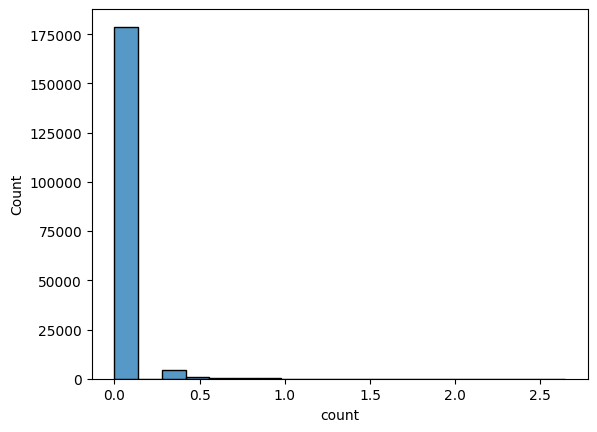

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.histplot(df_temp["count"].apply(np.log10))
plt.show()

In [74]:
df_temp["count"].sort_values()

92532       1
123371      1
123372      1
123373      1
123374      1
         ... 
4         137
3         147
2         169
1         209
0         443
Name: count, Length: 185066, dtype: int64

In [75]:
df_temp["count"].apply(lambda x: x//10).value_counts().sort_index()

0     184889
1        109
2         27
3         13
4          4
5          4
6          1
7          4
9          1
10         3
12         4
13         3
14         1
16         1
20         1
44         1
Name: count, dtype: int64

In [77]:
df_pre4.loc[df_pre4.ENG.str.contains("Ordering")]

,category,lawName,ENG,KOR
9776,국가공무원,공직자의 이해충돌 방지법,Ordering temporary suspension of the performan...,직무수행의 일시 중지 명령
85757,축산,축산계열화사업에 관한 법률,"Ordering contract farmers, vertical integrator...","계약농가, 계열화사업자 또는 계열화사업자의 임직원에 대하여 원가 및 경영상황에 관한..."
89456,산림,수목원·정원의 조성 및 진흥에 관한 법률,Ordering the restoration of forests to their o...,2의3. 제18조의2에 따라 준용되는 제7조제6항에 따른 정원조성계획의 승인을 취소...
111362,전기ㆍ가스,전기공사업법,Ordering the constructor to report on the busi...,공사업자에게 그 업무 및 시공 상황 등에 관한 보고를 명하는 것
134501,보건·의사,식품위생법,Ordering the relevant public officials to take...,관계 공무원으로 하여금 다음 각 목에 해당하는 출입ㆍ검사ㆍ수거 등의 조치
138816,보건·의사,인체조직안전 및 관리 등에 관한 법률 시행령,Ordering a tissue bank or tissue transplant ho...,"법 제24조의2에 따른 조직은행 또는 조직이식의료기관에 대한 조직의 사용중지, 회수..."
167827,환경,화학물질의 등록 및 평가 등에 관한 법률 시행령,"Ordering the submission of reports or data, ac...",법 제43조제1항에 따른 보고나 자료의 제출 명령 및 출입ㆍ검사 등(법 제43조제1...
167838,환경,화학물질의 등록 및 평가 등에 관한 법률 시행령,"Ordering the submission of reports or data, ac...",법 제43조제1항에 따른 보고나 자료의 제출 명령 및 출입ㆍ검사 등(법 제43조제1...
189615,해운,항로표지법 시행령,Ordering measures necessary to eliminate malfu...,법 제18조제4항에 따른 사설항로표지의 장애 해소에 필요한 조치 명령
189624,해운,항로표지법 시행령,Ordering the submission of materials and filin...,"법 제28조제1항에 따른 자료 제출 및 보고 명령, 출입ㆍ조사, 장부 및 그 밖의 ..."


In [270]:
df_pre4.loc[df_pre4.KOR.str.contains("삭제")]

,category,lawName,ENG,KOR
2721,국회,국회법,Any contents of the minutes prepared in the st...,"속기로 작성한 회의록의 내용은 삭제할 수 없으며, 발언을 통하여 자구 정정 또는 취..."
3107,선거ㆍ정당,국민투표법 시행령,When the name of a person listed in the pollbo...,투표인명부의 열람기간이 지난 후 투표인명부 확정전까지 투표인명부에 등재된 자중 오기...
3849,행정일반,개인정보 보호법 시행령,"Matters concerning access by data subjects, re...","정보주체의 열람, 개인정보의 정정ㆍ삭제ㆍ처리정지의 요구 및 조치 현황에 관한 사항"
3878,행정일반,개인정보 보호법 시행령,Personal information in electronic files shall...,"전자적 파일 형태인 경우: 복원이 불가능한 방법으로 영구 삭제. 다만, 기술적 특성..."
4143,행정일반,개인정보 보호법 시행령,A personal information controller who becomes ...,개인정보처리자는 개인정보가 유출되었음을 알게 되었을 때에는 서면등의 방법으로 지체 ...
...,...,...,...,...
194190,정보통신,전기통신사업법 시행령,"Measures to inform users in advance, through t...",불법촬영물등을 유통할 경우 법 제22조의5제1항에 따른 삭제ㆍ접속차단 등 유통방지에...
194348,정보통신,전기통신사업법 시행령,After concluding a contract: Where the means o...,계약 체결 후: 차단수단이 삭제되거나 차단수단이 15일 이상 작동하지 아니할 경우 ...
194551,정보통신,전기통신사업법 시행령,A telecommunications business operator who pro...,전파법에 따라 할당받은 주파수를 사용하여 전기통신역무를 제공하는 전기통신사업자는 신...
197755,정보통신,클라우드컴퓨팅 발전 및 이용자 보호에 관한 법률 시행령,When a cloud computing service provider destro...,클라우드컴퓨팅서비스 제공자가 법 제27조제3항 및 제4항에 따라 이용자 정보를 파기...


In [1]:
df_pre4.loc[df_pre4.ENG.str.contains("Transitional Measures concerning")]

NameError: ignored

## 3.3.앞 문자 확인

### 3.3.1 "[ ]" 케이스 확인

In [249]:
df_pre4.loc[df_pre4.ENG.str.contains("^\[")]

,category,lawName,ENG,KOR
5802,행정일반,민원 처리에 관한 법률 시행령,"[Enforcement Date: Apr. 1, 2023] Article 4 (1)...","[시행일: 2023. 4. 1.] 제4조제1항제1호, 제4조제1항제2호"


In [250]:
df_pre4.loc[df_pre4.KOR.str.contains("^\[")]

,category,lawName,ENG,KOR
5802,행정일반,민원 처리에 관한 법률 시행령,"[Enforcement Date: Apr. 1, 2023] Article 4 (1)...","[시행일: 2023. 4. 1.] 제4조제1항제1호, 제4조제1항제2호"
9597,국가공무원,공무원보수규정,Salary grade re-definition table for public of...,[별표 11]의 봉급표를 적용받는 공무원의 호봉재획정표
9598,국가공무원,공무원보수규정,Salary grade re-definition table for public of...,[별표 12]의 봉급표를 적용받는 공무원의 호봉재획정표
9608,국가공무원,공무원보수규정,A public official in political service under A...,[별표 2](정무직등)의 봉급표를 적용받는 공무원중 국가공무원법 제2조의 규정에 의...
9609,국가공무원,공무원보수규정,A public official of Grade I through Grade III...,[별표 3](일반직등)ㆍ[별표 4](공안직등)의 봉급표를 적용받는 공무원중 1급 내...
9610,국가공무원,공무원보수규정,A senior research official and senior technica...,[별표 5](연구직)ㆍ[별표 6](지도직)의 봉급표를 적용받는 공무원중 연구직 및지...
9611,국가공무원,공무원보수규정,"A commissioner general, chief superintendent g...",[별표 10](경찰ㆍ소방)의 봉급표를 적용받는 공무원중 치안총감 및 치안정감 내지 ...
9612,국가공무원,공무원보수규정,A public official who receives a salary of spe...,[별표 11](국민학교ㆍ중학교ㆍ고등학교 교원등)ㆍ[별표 12](전문대학ㆍ대학교원등)...
9613,국가공무원,공무원보수규정,Public officials subject to the salary table i...,[별표 13](군인)의 봉급표를 적용받는 공무원중 대장 내지 대령
9619,국가공무원,공무원보수규정,A public official subject to the salary table ...,[별표 2]의 봉급표를 적용받는 공무원


### 3.3.2. "< >" 케이스

In [ ]:
df_pre4.loc[df_pre4.ENG.str.contains("\<")]

,category,lawName,ENG,KOR
56103,과학ㆍ기술,과학기술기본법 시행령,Where the head of any relevant administrative ...,관계행정기관장은 확정된 시행계획의 주요 내용을 변경하려면 기획재정부장관 및 과학기술...
128475,수자원·토지·건설,수자원의 조사·계획 및 관리에 관한 법률,The Minister of Environment shall formulate an...,환경부장관은 수문조사의 체계화ㆍ효율화를 위하여 대통령령으로 정하는 바에 따라 10년...
147962,사회복지,사회보장기본법 시행령,"""Other specialized institutes or organizations...","법 제26조제3항제3호에서 ""대통령령으로 정하는 전문기관 또는 단체""란 다음 각 호..."
164035,환경,해양생태계의 보전 및 관리에 관한 법률,The State or local governments may conduct coo...,"국가 또는 지방자치단체는 해양생물의 보호, 해양생물 서식지의 보전 및 해양오염으로 ..."


In [ ]:
df_pre4.loc[df_pre4.ENG.str.contains("\>")]

,category,lawName,ENG,KOR
15238,민사법,가족관계의 등록 등에 관한 법률,> Among the amended provisions of the former p...,제14조제5항 전단 개정규정 중 특정증명서에 관한 부분은 이 법 공포 후 5년의 범...
15260,민사법,가족관계의 등록 등에 관한 법률,"> Among the amended provisions of Article 14 ,...",제15조의 개정규정 중 특정증명서에 관한 부분은 이 법 공포 후 5년의 범위에서 대...
17083,민사법,입양특례법,> Article 6,삭제 [시행일 : 2022. 7. 1.] 제6조
83621,축산,가축 및 축산물 이력관리에 관한 법률,No person who has obtained a license to engage...,축산물 위생관리법 제22조에 따른 도축업의 영업허가를 받은 자(이하 “도축업자”라 ...
86001,축산,축산물 위생관리법,Where a person running his or her livestock b...,축산법 제2조제8호에 따른 가축사육업을 경영하는 자가 식용란을 출하하는 때에는 총리...
183084,육운·항공·관광,항공보안법,"Detailed matters necessary to designate, manag...",제1항에 따른 항공보안 감독관의 지정ㆍ운영 및 점검업무 등에 대한 세부 사항은 국토...
